In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import scipy
import scikitplot as skplt
import sklearn
import statsmodels.api as sm
import os

In [2]:
## Importing Data
path = r"C:\Users\Mafalda\Documents\mafalda\Formação\Data Analytics\CareerFoundry\Data Analytics Program\2.Data Immersion\Achievement 6\Boat Sales Analysis"

In [3]:
df = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data_categories_v1.xlsx'), index_col = False)


In [4]:
df.shape

(9893, 14)

In [5]:
df.head()


,Column1,Price,Boat Type,Manufacturer,Condition,Boat Age,Year Built,Length,Width,Boat Area (m2),Visits,Material,Country,Visits_categorical
0,440,24900,Cabin Boat,Other,New,10.0,2013,6.00,1.90,11.40,129,Wood,Germany,Low
1,533,28500,Classic,Other,New,10.0,2013,5.38,1.75,9.42,92,Wood,Germany,Low
2,627,33000,Center console boat,Other,Used,10.0,2013,6.30,2.40,15.12,63,Other,Italy,Low
3,635,33000,Center console boat,Ranieri power boats,Used,10.0,2013,8.05,2.50,20.13,107,PVC,France,Low
4,834,47594,Sport Boat,Clear power boats,Used,10.0,2013,6.15,2.27,13.96,168,Other,Switzerland,Low


# Exploring Relationships

In [16]:
# Creating a correlation matrix using pandas
# Dropping categorical variables
df_sub=df.drop(['Column1','Boat Type', 'Manufacturer','Year Built','Condition', 'Material', 'Country', 'Visits_categorical'], axis=1)

In [20]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           9893 non-null   int64  
 1   Boat Age        9893 non-null   float64
 2   Length          9893 non-null   float64
 3   Width           9893 non-null   float64
 4   Boat Area (m2)  9893 non-null   float64
 5   Visits          9893 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 463.9 KB


In [21]:
df_sub.describe()

,Price,Boat Age,Length,Width,Boat Area (m2),Visits
count,9.893000e+03,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000
mean,3.032715e+05,25.306782,11.570017,3.520123,47.085896,149.177297
std,9.710542e+05,32.591339,5.998570,1.216765,46.945219,151.774013
min,0.000000e+00,2.000000,1.040000,0.010000,0.130000,13.000000
25%,4.300000e+04,6.000000,7.470000,2.550000,18.920000,70.000000
50%,9.400000e+04,16.000000,10.300000,3.350000,34.260000,108.000000
75%,2.490000e+05,27.000000,13.920000,4.250000,58.940000,172.000000
max,3.100000e+07,129.807237,100.000000,25.160000,1078.800000,3263.000000


In [22]:
df_sub.head()

,Price,Boat Age,Length,Width,Boat Area (m2),Visits
0,24900,10.0,6.00,1.90,11.40,129
1,28500,10.0,5.38,1.75,9.42,92
2,33000,10.0,6.30,2.40,15.12,63
3,33000,10.0,8.05,2.50,20.13,107
4,47594,10.0,6.15,2.27,13.96,168


In [23]:
# Creating the correlation matix 
df_sub.corr()

,Price,Boat Age,Length,Width,Boat Area (m2),Visits
Price,1.000000,-0.057519,0.562629,0.517336,0.639042,-0.008014
Boat Age,-0.057519,1.000000,0.029699,-0.047276,0.019619,0.036401
Length,0.562629,0.029699,1.000000,0.871131,0.949638,-0.134986
Width,0.517336,-0.047276,0.871131,1.000000,0.879706,-0.157318
Boat Area (m2),0.639042,0.019619,0.949638,0.879706,1.000000,-0.103592
Visits,-0.008014,0.036401,-0.134986,-0.157318,-0.103592,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

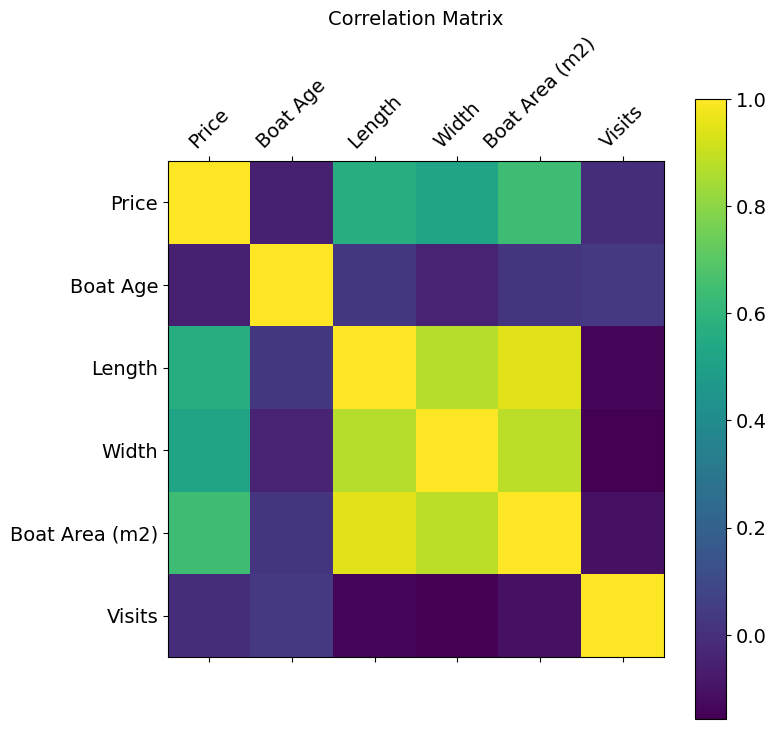

In [24]:
# Creating a correlation heatmap using matplotlib

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

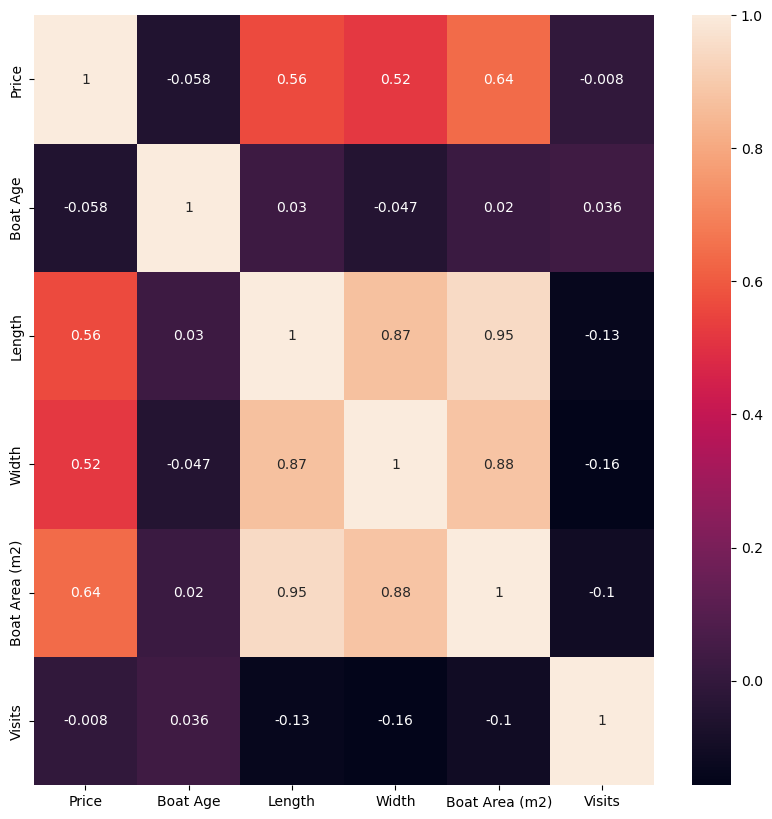

In [25]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax)

#### -The Price variable has a strong positive relationship with the variables Boat Area (0.64), Width (0.52) and Length (0.56), and no relationship with the variable Visits (0)
#### - The Boat Age variable has a weak positive relationship with the Width (0.13) and Length (0.12), and no relationship with the variable Visits (0)
#### - The Boat Area variables has a strong positive relationship with the variables Price (0.64), Width (0.88) and Length (0.95), and no relationship with the variable Visits (0)
#### - The variable Visits has no relationship with any of the other variables

# Multiple Linear Regression

In [26]:
# Defining X and Y variables
Y=df_sub['Visits']
X= df_sub[['Price', 'Boat Age', 'Length', 'Width', 'Boat Area (m2)']]
X=sm.add_constant(X)

In [27]:
print(X)

      const  Price  Boat Age  Length  Width  Boat Area (m2)
0       1.0  24900      10.0    6.00   1.90           11.40
1       1.0  28500      10.0    5.38   1.75            9.42
2       1.0  33000      10.0    6.30   2.40           15.12
3       1.0  33000      10.0    8.05   2.50           20.13
4       1.0  47594      10.0    6.15   2.27           13.96
...     ...    ...       ...     ...    ...             ...
9888    1.0  17900       9.0    5.25   2.33           12.23
9889    1.0  17000       9.0    6.15   2.42           14.88
9890    1.0  15000       9.0    5.80   2.32           13.46
9891    1.0  15000       9.0    5.79   2.13           12.33
9892    1.0   8490       9.0    6.00   2.75           16.50

[9893 rows x 6 columns]


In [28]:
print(Y)

0       129
1        92
2        63
3       107
4       168
       ... 
9888    254
9889    170
9890     75
9891     38
9892    144
Name: Visits, Length: 9893, dtype: int64


In [29]:

ks= sm.OLS(Y,X)
ks_res=ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Visits   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     83.54
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           3.10e-86
Time:                        19:27:43   Log-Likelihood:                -63519.
No. Observations:                9893   AIC:                         1.270e+05
Df Residuals:                    9887   BIC:                         1.271e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            273.6570      7.670     35.679      0.000     258.622     288.692
Price           1.015e-05   2.05e-06      4.943      0.000    6.13e-06    1.42e-05
Boat Age           0.1449      0.047      3.105      0.002       0.053       0.236
Length            -6.6716      0.831     -8.026      0.000      -8.301      -5.042
Width            -28.6009      2.704    -10.576      0.000     -33.902     -23.300
Boat Area (m2)     0.9906      0.119      8.354      0.000       0.758       1.223
==============================================================================
Omnibus:                    10939.614   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1442698.227
Skew:                           5.525   Prob(JB):                         0.00
Kurtosis:                      61.119   Cond. No.                     5.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# Defining X and Y variables, dropping length and width that are corrrelated do boat area
Y=df_sub['Visits']
X= df_sub[['Price', 'Boat Age','Boat Area (m2)']]
X=sm.add_constant(X)

In [32]:
ks1= sm.OLS(Y,X)
ks_res=ks1.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Visits   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     62.22
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           7.60e-40
Time:                        19:28:02   Log-Likelihood:                -63631.
No. Observations:                9893   AIC:                         1.273e+05
Df Residuals:                    9889   BIC:                         1.273e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            164.8710      2.488     66.257      0.000     159.993     169.749
Price           1.622e-05   2.03e-06      7.978      0.000    1.22e-05    2.02e-05
Boat Age           0.2129      0.047      4.569      0.000       0.122       0.304
Boat Area (m2)    -0.5522      0.042    -13.151      0.000      -0.634      -0.470
==============================================================================
Omnibus:                    10822.670   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1334747.708
Skew:                           5.446   Prob(JB):                         0.00
Kurtosis:                      58.852   Cond. No.                     1.67e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# Defining X and Y variables, dropping length and width that are corrrelated do boat area
Y=df_sub['Visits']
X= df_sub[['Price', 'Boat Age']]
X=sm.add_constant(X)

In [34]:
ks2= sm.OLS(Y,X)
ks_res=ks2.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Visits   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.735
Date:                Sat, 30 Dec 2023   Prob (F-statistic):            0.00119
Time:                        19:28:16   Log-Likelihood:                -63717.
No. Observations:                9893   AIC:                         1.274e+05
Df Residuals:                    9890   BIC:                         1.275e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        145.2093      2.006     72.374      0.000     141.276     149.142
Price      -9.285e-07   1.57e-06     -0.590      0.555   -4.01e-06    2.16e-06
Boat Age       0.1679      0.047      3.583      0.000       0.076       0.260
==============================================================================
Omnibus:                    10753.025   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1280070.204
Skew:                           5.397   Prob(JB):                         0.00
Kurtosis:                      57.671   Cond. No.                     1.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# Defining X and Y variables, dropping length and width that are corrrelated do boat area
Y=df_sub['Visits']
X= df_sub[['Price', 'Boat Age','Boat Area (m2)']]
X_train=sm.add_constant(X)

In [40]:
ks3= sm.OLS(Y,X_train).fit()

print(ks3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Visits   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     62.22
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           7.60e-40
Time:                        19:48:06   Log-Likelihood:                -63631.
No. Observations:                9893   AIC:                         1.273e+05
Df Residuals:                    9889   BIC:                         1.273e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            164.8710      2.488     66.